In [2]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis

# Aproximación

Aproximar $e$ hasta 6 dígitos decimales.

Para hacer esta aproximación, recordemos los siguientes tres resultados teóricos, véase [1] :

---
Si $p$ es una cantidad que deseamos aproximar mediante un número $q$, decimos que $q$ aproxima a $p$ hasta $k$ lugares decimales si la magnitud de la diferencia no es más grande que $5 \times 10^{-(k+1)}$, es decir: $\displaystyle |p - q| \leq 5 \times 10^{-(k+1)}$.

---
Si $|f^{(n+1)}(x)| \leq M$ en el intervalo $(a-x, a+x)$ entonces el residuo es

$\displaystyle
\boxed{R_n(x) \leq \frac{M(x-a)^{n+1}}{(n+1)!}}
$

---
Forma del Residuo de Lagrange:

$$
R_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-a)^{n+1}
$$

---

Con lo anterior en mente, procedamos a realizar la aproximación.

Primero escribimos la serie de Taylor de la función $f(x)=e^x$ alrededor de $x=0$:

$\displaystyle
T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots + \frac{x^n}{n!}
$

Usaremos el intervalo $(0,1)$ para acotar el residuo.

Sabemos que:
1. $e^0 = 1 = T_n(0)$
2. $e^1 = e \approx T_n(1)$
3. $e^\xi < e^x$ para $0 < \xi < x$

Usando la fórmula del residuo de Lagrange, primero debemos estimar $f^{(n+1)}(\xi) = e^\xi$. Hagamos la expansión de Taylor de primer orden alrededor de 0 junto con su residuo:

$\displaystyle
e^x  = T_1(x) + R_1(x) = 1 + x + \frac{e^\xi}{2!}x^2 
$

Dado que $e^\xi < e^x$ para $0 < \xi < x \leq 1$ entonces:

$\displaystyle
e^x  = 1 + x + \frac{e^\xi}{2!}x^2 < 1 + x + \frac{e^x}{2!}x^2 
\quad \Longrightarrow \quad 
e^x \leq 1 + x + \frac{e^x}{2!}x^2 \quad \text{para} \quad 0 \leq x \leq 1
$

de donde obtenemos:

$\displaystyle
\boxed{e^x \leq \frac{2 + 2x}{2 - x^2} \quad \text{para} \quad 0 \leq x \leq 1 }
$

Una gráfica de la función $\displaystyle \frac{2 + 2x}{2 - x^2}$ se puede ver en la siguiente figura:

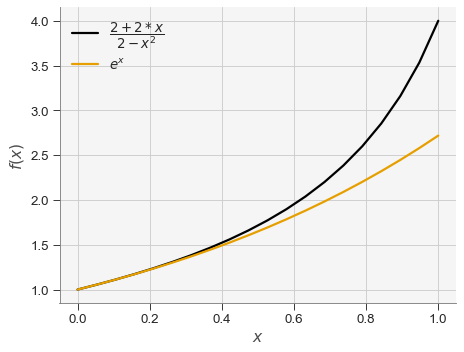

In [3]:
xe = np.linspace(0,1,20) # Codominio de la función

# Graficamos la función
plt.plot(xe, (2 + 2*xe) / (2 - xe**2), label='$\dfrac{2 + 2*x}{2 - x^2}$')
plt.plot(xe, np.exp(xe), label='$e^x$')

# Configuración de la gráfica
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

Observamos que $M = 4$ es una cota superior para $f^{(n+1)}(\xi) = e^\xi$ con $0 < \xi < 1$, por lo tanto el residuo es:

$\displaystyle
|R_n(x)| \leq \frac{M x^{n+1}}{(n+1)!} \leq \frac{4}{(n+1)!} \quad \text{para} \quad 0 \leq x \leq 1
$

Como se quiere aproximar con 6 dígitos decimales, entonces debemos encontrar una $n$ que satisfaga la siguiente condición: 

$\displaystyle
\frac{4}{(n+1)!} \leq 5 \times 10^{-7} 
$

Esto lo hacemos con el siguiente código:

In [4]:
import math
def calc_n(M, k=1):
    """
    Calcula el grado n de la serie de Taylor necesaria para aproximar la
    función e^x hasta k digitos decimales.
    """
    n = 0
    v = 1.0
    while v > 5.0 * 10**(-(k+1)):
        v = M / math.factorial(n+1)
        n += 1
    return n

def Taylor_e(n):
    """
    Calcula el valor de e con un polinomio de Taylor de grado n
    """
    e = 0
    for i in range(0,n+1):
        e += 1 / math.factorial(i)
        print('Polinomio de grado {:3d}. Aproximación : {:2.10f}'.format(i,e))
    return e

In [5]:
e_aprox = Taylor_e(calc_n(4,6))

Polinomio de grado   0. Aproximación : 1.0000000000
Polinomio de grado   1. Aproximación : 2.0000000000
Polinomio de grado   2. Aproximación : 2.5000000000
Polinomio de grado   3. Aproximación : 2.6666666667
Polinomio de grado   4. Aproximación : 2.7083333333
Polinomio de grado   5. Aproximación : 2.7166666667
Polinomio de grado   6. Aproximación : 2.7180555556
Polinomio de grado   7. Aproximación : 2.7182539683
Polinomio de grado   8. Aproximación : 2.7182787698
Polinomio de grado   9. Aproximación : 2.7182815256
Polinomio de grado  10. Aproximación : 2.7182818011
Polinomio de grado  11. Aproximación : 2.7182818262


In [6]:
print('Aproximación final: {:2.10f}'.format(e_aprox))
print('Valor de numpy    : {:2.10f}'.format(np.exp(1)))
print('Error de la aprox : {:2.10f}'.format(np.fabs(e_aprox - np.exp(1))))

Aproximación final: 2.7182818262
Valor de numpy    : 2.7182818285
Error de la aprox : 0.0000000023
